In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

act = pd.read_csv('OTg6QzA_activities.csv')
act.shape #데이터 구조, 행열 크기 알아보기

(66281, 4)

In [9]:
#22년1월1일 데이터만 추출해서, 가시화를 해보자
data220101 = act.copy()

# 데이터 범위를 이렇게 재귀 조건문으로 지정할 수 있다.
data220101 = act[ (act['timestamp'] >= '2022-01-01 00:00:00.000')  & (act['timestamp'] < '2022-01-02 00:00:00.000') ]

# 마찬가지로 shift(1)로 timestamp열값이 하나씩 아래로 이동시킨다.
data220101['p_timestamp'] = data220101.timestamp.shift(1)
data220101['p_x'] = data220101['X'].shift(1)
data220101['p_y'] = data220101['Y'].shift(1)
data220101['p_z'] = data220101['Z'].shift(1)
data220101.head(5)


C:\Users\sunin\AppData\Local\Temp\ipykernel_32108\1571542790.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data220101['p_timestamp'] = data220101.timestamp.shift(1)
C:\Users\sunin\AppData\Local\Temp\ipykernel_32108\1571542790.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data220101['p_x'] = data220101['X'].shift(1)
C:\Users\sunin\AppData\Local\Temp\ipykernel_32108\1571542790.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

,timestamp,X,Y,Z,p_timestamp,p_x,p_y,p_z
0,2022-01-01 00:01:40.363,33,76,56,None,NaN,NaN,NaN
1,2022-01-01 00:01:42.961,34,87,56,2022-01-01 00:01:40.363,33.0,76.0,56.0
2,2022-01-01 00:01:45.562,25,89,47,2022-01-01 00:01:42.961,34.0,87.0,56.0
3,2022-01-01 00:01:48.163,11,70,50,2022-01-01 00:01:45.562,25.0,89.0,47.0
4,2022-01-01 00:02:08.864,33,72,58,2022-01-01 00:01:48.163,11.0,70.0,50.0


In [10]:
# NaN 값이 있는 행을 삭제하자. NaN가 있으면 거리 및 속도 계산할 수 없다.
# 첫번째 행이 삭제될 것이다.
cleaned = data220101.dropna()
cleaned.head(5)

,timestamp,X,Y,Z,p_timestamp,p_x,p_y,p_z
1,2022-01-01 00:01:42.961,34,87,56,2022-01-01 00:01:40.363,33.0,76.0,56.0
2,2022-01-01 00:01:45.562,25,89,47,2022-01-01 00:01:42.961,34.0,87.0,56.0
3,2022-01-01 00:01:48.163,11,70,50,2022-01-01 00:01:45.562,25.0,89.0,47.0
4,2022-01-01 00:02:08.864,33,72,58,2022-01-01 00:01:48.163,11.0,70.0,50.0
5,2022-01-01 00:02:21.765,21,68,58,2022-01-01 00:02:08.864,33.0,72.0,58.0


In [11]:
import time
from datetime import datetime


# 10분단위별 활동지수
def make_hour_unixtime(df):
    temp = datetime.strptime(df['timestamp'], "%Y-%m-%d %H:%M:%S.%f")
    return int(time.mktime(temp.timetuple()) // 600)

# 10분 단위 문자열 만들기
def hour_min(df):
    d = datetime.strptime(df['timestamp'], "%Y-%m-%d %H:%M:%S.%f")
    newt1 = int(time.mktime(d.timetuple()) // 600) * 600
    newt2 = datetime.fromtimestamp(newt1)
    return "{:02d}:{:02d}".format(newt2.hour, newt2.minute)
    
tenmin = cleaned.copy()
tenmin['utime'] =cleaned[["timestamp"]].apply(make_hour_unixtime, axis=1)

# hm은 그래프의 x축 눈금을 위해서 만든다.
tenmin['hm'] =cleaned[["timestamp"]].apply(hour_min, axis=1)
tenmin.head(5)


,timestamp,X,Y,Z,p_timestamp,p_x,p_y,p_z,utime,hm
1,2022-01-01 00:01:42.961,34,87,56,2022-01-01 00:01:40.363,33.0,76.0,56.0,2734938,00:00
2,2022-01-01 00:01:45.562,25,89,47,2022-01-01 00:01:42.961,34.0,87.0,56.0,2734938,00:00
3,2022-01-01 00:01:48.163,11,70,50,2022-01-01 00:01:45.562,25.0,89.0,47.0,2734938,00:00
4,2022-01-01 00:02:08.864,33,72,58,2022-01-01 00:01:48.163,11.0,70.0,50.0,2734938,00:00
5,2022-01-01 00:02:21.765,21,68,58,2022-01-01 00:02:08.864,33.0,72.0,58.0,2734938,00:00


In [ ]:
"""
데이터 정제하기
"""

In [7]:
"""
근데 X 축 간격이 일정하지 않은 것 같다. 여러분의 눈이 정확했다. 노약자의 움직임이 감지된 정보만 DB에 저장되었기 때문에,
시간정보자체가 없는 것이다. 그럼 어떻게 하면 좋을까? 매 10번 마다 activity를 0인 DataFrame를 만들고,
집계된 자료를 그 DataFrame에 넣으면 되지않을까 라는 생각이 든다.
한번 상상한 대로 코드를 작성해 보자.
"""

from datetime import datetime


def hour_min(df):
    newt1 = df['utime'] * 600
    newt2 = datetime.fromtimestamp(newt1)
    return "{:02d}:{:02d}".format(newt2.hour, newt2.minute)


newtenmin = pd.DataFrame(np.empty((144,3)),
            columns=['utime', 'hm','mean'])

newtenmin[:] = np.nan

newtenmin['utime'] = np.arange(2734938,2735082,1)
newtenmin['hm'] = newtenmin[["utime"]].apply(hour_min, axis=1)

newtenmin

,utime,hm,mean
0,2734938,00:00,NaN
1,2734939,00:10,NaN
2,2734940,00:20,NaN
3,2734941,00:30,NaN
4,2734942,00:40,NaN
...,...,...,...
139,2735077,23:10,NaN
140,2735078,23:20,NaN
141,2735079,23:30,NaN
142,2735080,23:40,NaN


In [12]:
# 거리 계산
def calc_dist(df):
    x_d = df['X'] - df['p_x']
    y_d = df['Y'] - df['p_y']
    z_d = df['Z'] - df['p_z']
    return np.sqrt(x_d**2 + y_d**2 + z_d**2)
       

tenmin['dist'] = tenmin[["X","p_x", "Y", "p_y", "Z", "p_z"]].apply(calc_dist, axis=1)
tenmin.head(5)


,timestamp,X,Y,Z,p_timestamp,p_x,p_y,p_z,utime,hm,dist
1,2022-01-01 00:01:42.961,34,87,56,2022-01-01 00:01:40.363,33.0,76.0,56.0,2734938,00:00,11.045361
2,2022-01-01 00:01:45.562,25,89,47,2022-01-01 00:01:42.961,34.0,87.0,56.0,2734938,00:00,12.884099
3,2022-01-01 00:01:48.163,11,70,50,2022-01-01 00:01:45.562,25.0,89.0,47.0,2734938,00:00,23.790755
4,2022-01-01 00:02:08.864,33,72,58,2022-01-01 00:01:48.163,11.0,70.0,50.0,2734938,00:00,23.494680
5,2022-01-01 00:02:21.765,21,68,58,2022-01-01 00:02:08.864,33.0,72.0,58.0,2734938,00:00,12.649111


In [13]:
# 시간 차분을 구한 다음, d_time 열에 저장한다.
from datetime import datetime
import time


def calc_timediff(df):
    d1 = datetime.strptime(str(df['timestamp']), "%Y-%m-%d %H:%M:%S.%f")
    d2 = datetime.strptime(str(df['p_timestamp']), "%Y-%m-%d %H:%M:%S.%f")
    return (d1 - d2).total_seconds()

tenmin['d_time'] = tenmin[["timestamp", "p_timestamp"]].apply(calc_timediff, axis=1)
tenmin.head(5)


,timestamp,X,Y,Z,p_timestamp,p_x,p_y,p_z,utime,hm,dist,d_time
1,2022-01-01 00:01:42.961,34,87,56,2022-01-01 00:01:40.363,33.0,76.0,56.0,2734938,00:00,11.045361,2.598
2,2022-01-01 00:01:45.562,25,89,47,2022-01-01 00:01:42.961,34.0,87.0,56.0,2734938,00:00,12.884099,2.601
3,2022-01-01 00:01:48.163,11,70,50,2022-01-01 00:01:45.562,25.0,89.0,47.0,2734938,00:00,23.790755,2.601
4,2022-01-01 00:02:08.864,33,72,58,2022-01-01 00:01:48.163,11.0,70.0,50.0,2734938,00:00,23.494680,20.701
5,2022-01-01 00:02:21.765,21,68,58,2022-01-01 00:02:08.864,33.0,72.0,58.0,2734938,00:00,12.649111,12.901


In [14]:
# 속도를 구한 다음, calc_act 열에 저장한다.

def calc_act(df):
    if df['d_time'] != 0:
        return np.abs(df['dist'] / df['d_time'])
    else:
        # 정상적인 수가 아님.
        return 0


tenmin['calc_act'] = tenmin[["dist", "d_time"]].apply(calc_act, axis=1)
tenmin.head(5)


,timestamp,X,Y,Z,p_timestamp,p_x,p_y,p_z,utime,hm,dist,d_time,calc_act
1,2022-01-01 00:01:42.961,34,87,56,2022-01-01 00:01:40.363,33.0,76.0,56.0,2734938,00:00,11.045361,2.598,4.251486
2,2022-01-01 00:01:45.562,25,89,47,2022-01-01 00:01:42.961,34.0,87.0,56.0,2734938,00:00,12.884099,2.601,4.953517
3,2022-01-01 00:01:48.163,11,70,50,2022-01-01 00:01:45.562,25.0,89.0,47.0,2734938,00:00,23.790755,2.601,9.146772
4,2022-01-01 00:02:08.864,33,72,58,2022-01-01 00:01:48.163,11.0,70.0,50.0,2734938,00:00,23.494680,20.701,1.134954
5,2022-01-01 00:02:21.765,21,68,58,2022-01-01 00:02:08.864,33.0,72.0,58.0,2734938,00:00,12.649111,12.901,0.980475


In [15]:
# hm으로 그룹핑하기
grouped = tenmin.groupby(['hm'])
grouped_calc_act = grouped['calc_act']
result = grouped_calc_act.agg(['mean'])

result

,mean
hm,
00:00,2.359774
00:10,3.804910
00:20,1.204413
00:30,0.065608
00:50,6.089196
...,...
23:00,4.334201
23:10,4.610322
23:20,1.577668


In [16]:
#인덱스 utime을 열로 변환
result = result.reset_index()
result.head(5)


,hm,mean
0,00:00,2.359774
1,00:10,3.804910
2,00:20,1.204413
3,00:30,0.065608
4,00:50,6.089196


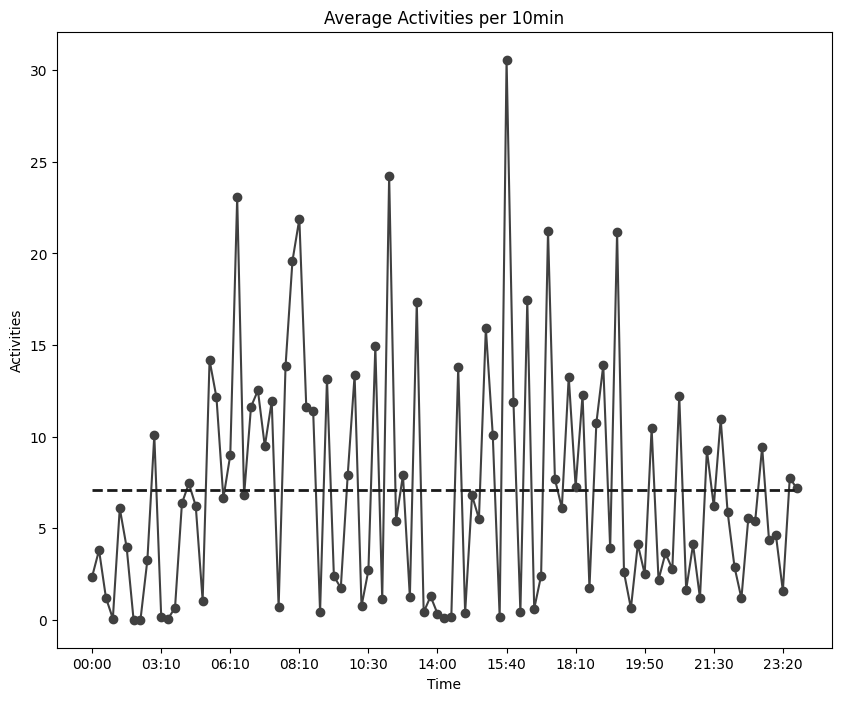

In [17]:
from matplotlib.ticker import MaxNLocator

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1,1,1)

# plt.rcParams['figure.figsize'] = [10, 8]

plt.plot(result['hm'] , result['mean'], c='0.25', marker='o')

# 활동 평균 선
plt.hlines(result['mean'].mean(), result['hm'].min(), result['hm'].max(), color='0.1', linestyle='--', linewidth=2)

plt.title("Average Activities per 10min")
plt.xlabel("Time")
plt.ylabel("Activities")

# x tick를 10간격으로 표시
ax.set_xticks(ax.get_xticks()[::10])

plt.show()


In [18]:
result.head(10)

,hm,mean
0,00:00,2.359774
1,00:10,3.804910
2,00:20,1.204413
3,00:30,0.065608
4,00:50,6.089196
5,01:10,3.948859
6,02:00,0.006504
7,02:20,0.009195
8,02:50,3.269841
9,03:00,10.078717


## 데이터 정제하기

In [19]:
"""
근데 X 축 간격이 일정하지 않은 것 같다. 여러분의 눈이 정확했다. 노약자의 움직임이 감지된 정보만 DB에 저장되었기 때문에,
시간정보자체가 없는 것이다. 그럼 어떻게 하면 좋을까? 매 10번 마다 activity를 0인 DataFrame를 만들고,
집계된 자료를 그 DataFrame에 넣으면 되지않을까 라는 생각이 든다.
한번 상상한 대로 코드를 작성해 보자.
"""

from datetime import datetime


def hour_min(df):
    newt1 = df['utime'] * 600
    newt2 = datetime.fromtimestamp(newt1)
    return "{:02d}:{:02d}".format(newt2.hour, newt2.minute)


newtenmin = pd.DataFrame(np.empty((144,3)),
            columns=['utime', 'hm','mean'])

newtenmin[:] = np.nan

newtenmin['utime'] = np.arange(2734938,2735082,1)
newtenmin['hm'] = newtenmin[["utime"]].apply(hour_min, axis=1)

newtenmin


,utime,hm,mean
0,2734938,00:00,NaN
1,2734939,00:10,NaN
2,2734940,00:20,NaN
3,2734941,00:30,NaN
4,2734942,00:40,NaN
...,...,...,...
139,2735077,23:10,NaN
140,2735078,23:20,NaN
141,2735079,23:30,NaN
142,2735080,23:40,NaN


In [20]:
# hm으로 그룹핑하기
grouped = tenmin.groupby(['hm'])
grouped_calc_act = grouped['calc_act']
result = grouped_calc_act.agg(['mean'])

result


,mean
hm,
00:00,2.359774
00:10,3.804910
00:20,1.204413
00:30,0.065608
00:50,6.089196
...,...
23:00,4.334201
23:10,4.610322
23:20,1.577668


In [21]:
# result에서 평균값이 0를 넘는 값만 newtenmin로 결합해보자
newData = pd.merge(newtenmin, result [ result['mean'] > 0], on="hm", how="left")
newData


,utime,hm,mean_x,mean_y
0,2734938,00:00,NaN,2.359774
1,2734939,00:10,NaN,3.804910
2,2734940,00:20,NaN,1.204413
3,2734941,00:30,NaN,0.065608
4,2734942,00:40,NaN,NaN
...,...,...,...,...
139,2735077,23:10,NaN,4.610322
140,2735078,23:20,NaN,1.577668
141,2735079,23:30,NaN,7.753006
142,2735080,23:40,NaN,7.176995


In [22]:
# mean_x가 결측치면 mean_y값을 new_mean로 대입하라
newData['new_mean'] = newData['mean_x'].fillna(newData['mean_y'])
newData


,utime,hm,mean_x,mean_y,new_mean
0,2734938,00:00,NaN,2.359774,2.359774
1,2734939,00:10,NaN,3.804910,3.804910
2,2734940,00:20,NaN,1.204413,1.204413
3,2734941,00:30,NaN,0.065608,0.065608
4,2734942,00:40,NaN,NaN,NaN
...,...,...,...,...,...
139,2735077,23:10,NaN,4.610322,4.610322
140,2735078,23:20,NaN,1.577668,1.577668
141,2735079,23:30,NaN,7.753006,7.753006
142,2735080,23:40,NaN,7.176995,7.176995


In [23]:
# NaN값을 zero로 채우기
newData = newData.fillna(0)
newData


,utime,hm,mean_x,mean_y,new_mean
0,2734938,00:00,0.0,2.359774,2.359774
1,2734939,00:10,0.0,3.804910,3.804910
2,2734940,00:20,0.0,1.204413,1.204413
3,2734941,00:30,0.0,0.065608,0.065608
4,2734942,00:40,0.0,0.000000,0.000000
...,...,...,...,...,...
139,2735077,23:10,0.0,4.610322,4.610322
140,2735078,23:20,0.0,1.577668,1.577668
141,2735079,23:30,0.0,7.753006,7.753006
142,2735080,23:40,0.0,7.176995,7.176995


In [24]:
# 정제된 데이터 평균값의 평균값
newData['new_mean'].mean()


5.080677143655119

In [25]:
# 이전 평균값의 평균값
result['mean'].mean()


7.103082608605214

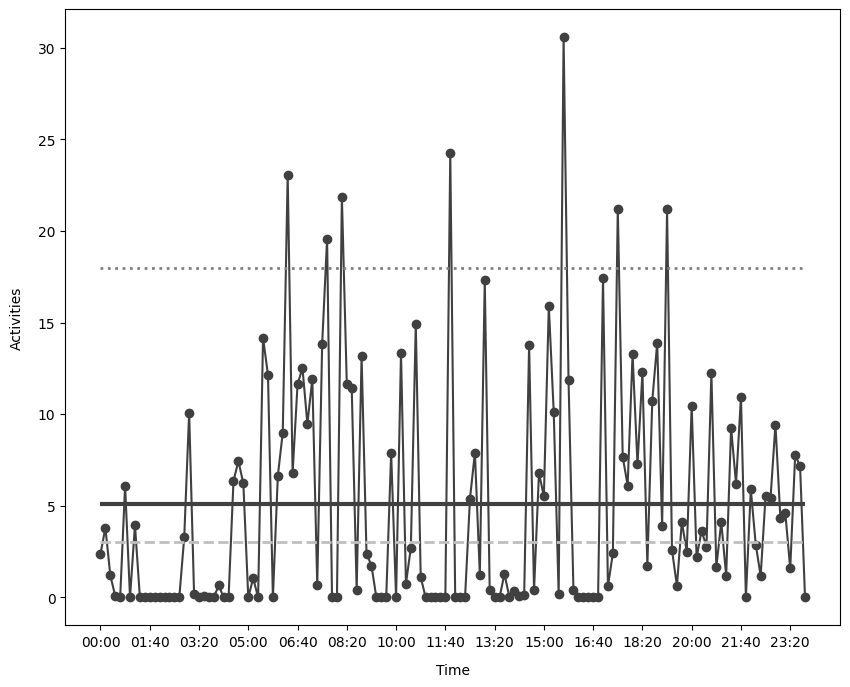

In [26]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1,1,1)

ax.plot(newData['hm'], newData['new_mean'], c='0.25', marker='o')

# 전체 평균
ax.hlines(newData['new_mean'].mean(), newData['hm'].min(), newData['hm'].max(), color='0.25', linestyle='-', linewidth=3)

# 초당 평균 속도 18cm/sec이상이라면, 상체가 움직인다고 간주하고
ax.hlines(18, newData['hm'].min(), newData['hm'].max(), color='0.5', linestyle=':', linewidth=2)

# 초당 평균 속도 5cm/sec이하라면, 거의 움직임이 없다고 간주
ax.hlines(3, newData['hm'].min(), newData['hm'].max(), color='0.75', linestyle='--', linewidth=2)

# x tick를 10간격으로 표시
ax.set_xticks(ax.get_xticks()[::10])

# X, Y축 레이블 정하기
plt.xlabel('Time', labelpad=10)
plt.ylabel('Activities', labelpad=10)

plt.show()


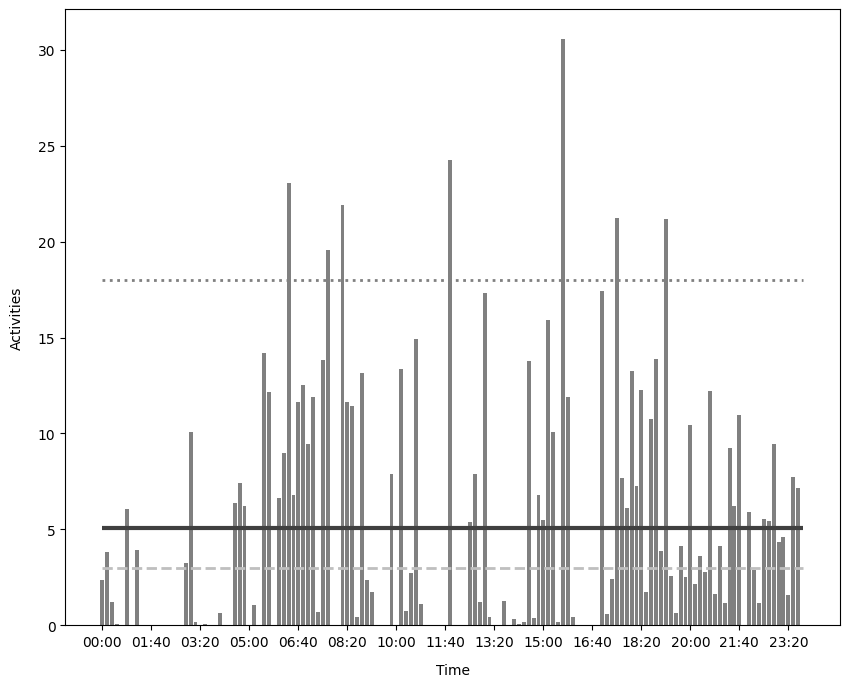

In [27]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1,1,1)

# 막대그래프 그리기
ax.bar(newData['hm'], newData['new_mean'], color='gray')

# 전체 평균
ax.hlines(newData['new_mean'].mean(), newData['hm'].min(), newData['hm'].max(), color='0.25', linestyle='-', linewidth=3)

# 초당 평균 속도 18cm/sec이상이라면, 상체가 움직인다고 간주하고
ax.hlines(18, newData['hm'].min(), newData['hm'].max(), color='0.5', linestyle=':', linewidth=2)

# 초당 평균 속도 5cm/sec이하라면, 거의 움직임이 없다고 간주
ax.hlines(3, newData['hm'].min(), newData['hm'].max(), color='0.75', linestyle='--', linewidth=2)

# x tick를 10간격으로 표시
ax.set_xticks(ax.get_xticks()[::10])

# X, Y축 레이블 정하기
plt.xlabel('Time', labelpad=10)
plt.ylabel('Activities', labelpad=10)

plt.show()
